#### 1) 데이터 불러오기

In [225]:
import os
import cv2
import numpy as np
import random
import torch

# 시드(seed) 고정
random_seed = 2024
torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [226]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
%cd /content/drive/MyDrive/Colab Notebooks/딥러닝과 응용/SourceCode_01_GD_ANN/Datasets

/content/drive/MyDrive/Colab Notebooks/딥러닝과 응용/SourceCode_01_GD_ANN/Datasets


In [228]:
# 하이퍼 파라미터 설정
class Parameters():
    def __init__(self):
        self.description = 'ResNet for Image Classification'
        # 에포크 수
        self.epochs = 50
        # 배치 크기
        self.batch_size = 16
        # 학습률
        self.learning_rate = 1e-4 # 0.0001
        # 훈련된 모델 경로
        self.model_name = 'ResNet'
        # 파일명
        self.data_path = './Datasets/SEM'
args = Parameters()

In [229]:
# 알집 풀기, 알집경로, 해제할경로
!unzip  -o './SEM.zip' -d  ./Datasets

Archive:  ./SEM.zip
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (1).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (10).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (100).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (101).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (11).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (12).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (13).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (14).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (15).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (16).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (17).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (18).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (19).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (2).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (20).jpg  
  inflating: ./Datasets/SEM/Test/LSAC/lsac_test (21).jpg  
  inflating: ./Datasets/SEM/Test/LSA

In [230]:

def load_dataset(groups_folder_path, categories):

    Y = []
    X = []

    for idx, category in enumerate(categories):
        label = idx  # 정수 레이블로 변경
        image_dir = os.path.join(groups_folder_path, category)

        file_list = os.listdir(image_dir)

        for filename in file_list:
            if filename.lower().endswith('.jpg'):
                url = os.path.join(image_dir, filename)
                img = cv2.imread(url)
                if img is not None:  # 이미지를 성공적으로 읽었는지 확인
                    X.append(img)
                    Y.append(label)

    return X, Y

train_folder_path = os.path.join(args.data_path, 'Train')
test_folder_path = os.path.join(args.data_path, 'Test')
categories = ['LSAC', 'RING', 'SPOT']

X, Y = load_dataset(train_folder_path, categories)
x_test, y_test = load_dataset(test_folder_path, categories)

In [231]:
X = np.array(X)
Y = np.array(Y)
x_test = np.array(x_test)
y_test = np.array(y_test)

print(f"훈련 이미지 데이터 shape: {X.shape}")
print(f"훈련 레이블 데이터 shape: {Y.shape}")
print(np.unique(Y, return_counts=True))

print(f"\n테스트 이미지 데이터 shape: {x_test.shape}")
print(f"테스트 레이블 데이터 shape: {y_test.shape}")
print(np.unique(y_test, return_counts=True))

훈련 이미지 데이터 shape: (803, 224, 224, 3)
훈련 레이블 데이터 shape: (803,)
(array([0, 1, 2]), array([267, 268, 268]))

테스트 이미지 데이터 shape: (303, 224, 224, 3)
테스트 레이블 데이터 shape: (303,)
(array([0, 1, 2]), array([101, 101, 101]))


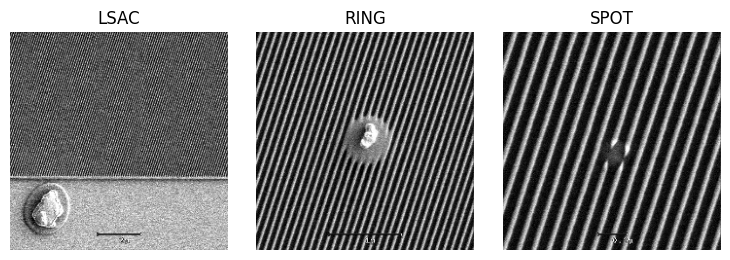

In [232]:
import matplotlib.pyplot as plt

# 클래스별로 이미지 하나씩 시각화
num_classes = len(categories)

# 각 클래스의 첫 번째 이미지 인덱스 찾기
class_first_indices = [np.where(Y == i)[0][0] for i in range(num_classes)]

# 이미지 출력 설정
plt.figure(figsize=(10, 5))
for i, idx in enumerate(class_first_indices):
    plt.subplot(2, 4, i + 1)  # 2행 5열의 subplot을 만들고 각 클래스별 이미지 출력
    plt.imshow(X[idx])
    plt.title(categories[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [233]:
from sklearn.model_selection import train_test_split
# 훈련 및 테스트 데이터 추출
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (642, 224, 224, 3)
y_train shape: (642,)
x_valid shape: (161, 224, 224, 3)
y_valid shape: (161,)
x_test shape: (303, 224, 224, 3)
y_test shape: (303,)


In [234]:
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

# For normalization, ImageNet 데이터셋에 사용된 평균과 표준편차 사용
in_mean = (0.485, 0.456, 0.406)
in_std = (0.229, 0.224, 0.225)

# 데이터 증강 정의 (학습 데이터셋에만 적용)

# transofrms.Normalize((R채널 평균, G채널 평균, B채널 평균), (R채널 표준편차, G채널 표준편차, B채널 표준편차))

# 증강 확률의 기본값은 0.5
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomVerticalFlip(), # 상하 반전
    transforms.RandomHorizontalFlip(), # 좌우 반전
    transforms.RandomRotation(90), #  (-degree, +degree) 사이만큼 회전
    transforms.RandomGrayscale(), # 흑백화
    transforms.ToTensor(), #  0 ~ 1 범위로 변환
   # transforms.RandomErasing(),
    transforms.Normalize(in_mean, in_std) # 사전에 정의한 평균과 표준편차를 사용하여 정규화
])

# 검증 및 테스트 데이터셋에는 증강 적용 안 함
test_transform = transforms.Compose([
    transforms.ToTensor(), #  0 ~ 1 범위로 변환
    transforms.Normalize(in_mean, in_std) # 사전에 정의한 평균과 표준편차를 사용하여 정규화
])

class CustomDataset(Dataset):
    def __init__(self, X, y, mode='train'):  # mode 인자 추가
        self.X = X
        self.y = torch.tensor(y, dtype=torch.long)
        self.mode = mode  # mode 저장

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]
        if self.mode == 'train':
            x = train_transform(x)
        else:  # 'valid' 또는 'test'
            x = test_transform(x)
        y = self.y[idx]
        return x, y

# Dataset 생성
train_dataset = CustomDataset(x_train, y_train, mode='train')
valid_dataset = CustomDataset(x_valid, y_valid, mode='valid')
test_dataset = CustomDataset(x_test, y_test, mode='test')
# DataLoader 정의

train_loader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True) # 학습 로더에서 나오는 데이터는 항상 섞어줍니다
valid_loader = DataLoader(valid_dataset, batch_size=args.batch_size, shuffle=False) # 평가를 위해서 순차적으로 나오게 합니다
test_loader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False) # 평가를 위해서 순차적으로 나오게 합니다

#### 2) Resnet18

![alt text](https://www.researchgate.net/publication/336642248/figure/fig1/AS:839151377203201@1577080687133/Original-ResNet-18-Architecture.png)

##### 구조:

- **Residual Block:** ResNet의 기본 구성 요소로, skip connection과 함께 여러 개의 convolutional layer로 구성됨
- **Identity Mapping:** 입력과 출력의 차원이 같을 경우, skip connection은 입력을 그대로 더해줌
- 입력과 출력의 차원이 다를 경우, skip connection은 1x1 convolution을 사용하여 차원을 맞춰줌

##### 장점:

- **매우 깊은 신경망 학습 가능:** skip connection을 통해 그래디언트가 잘 전달되어 깊은 신경망에서도 안정적인 학습 가능

##### 종류:

ResNet은 레이어의 개수에 따라 ResNet18, ResNet34, ResNet50, ResNet101, ResNet152 등으로 불림


#### 3) 모델 불러오기 (Resnet18)

In [235]:
import torchvision.models as models
import torch.nn as nn

model = models.resnet18().to(device)
model.fc = nn.Linear(512, 3).to(device)

#### 3) 학습

In [236]:
class EarlyStopping:
    """
    조기 종료(Early Stopping) 클래스: 특정 에폭 동안 손실(loss)이 개선되지 않으면 훈련 중단
    """

    def __init__(self, patience=3, min_delta=0):
        """
        초기화 함수: patience, min_delta 값을 설정하고 카운터, best_loss를 초기화

        min_delta (float): 새로운 손실이 이전 손실보다 개선되었다고 간주하기 위한 최소 차이
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None

    def __call__(self, val_loss):
        """
         검증 손실(val_loss)을 받아 조기 종료 여부를 결정

        Returns:
            bool: 조기 종료해야 하는 경우 True, 계속 훈련해야 하는 경우 False
        """
        if self.best_loss is None:  # 첫 번째 에폭인 경우 best_loss 설정
            self.best_loss = val_loss

        elif self.best_loss - val_loss > self.min_delta:  # 손실이 충분히 개선된 경우
            self.best_loss = val_loss
            self.counter = 0  # 카운터 초기화

        else:  # 손실이 개선되지 않은 경우
            self.counter += 1

            if self.counter >= self.patience:  # patience 만큼 손실이 개선되지 않으면
                print("[INFO] Early stopping")  # 조기 종료 메시지 출력
                return True  # 조기 종료 신호 반환

        return False  # 계속 훈련 신호 반환

In [237]:
import torch

class LRScheduler():
    """
    학습률 스케줄러. 주어진 `patience` 에포크 동안 검증 손실이 감소하지 않으면
    학습률을 주어진 `factor`만큼 감소.
    """
    def __init__(self, optimizer, patience=5, min_lr=1e-6, factor=0.5, verbose=True):
        """
        new_lr = old_lr * factor
        :param optimizer: 사용할 옵티마이저
        :param patience: 학습률을 업데이트하기 전에 기다릴 에포크 수
        :param min_lr: 학습률이 감소할 수 있는 최소 값
        :param factor: 학습률을 감소시킬 비율
        :param verbose: 학습률이 조정될 때 메시지를 출력할지 여부
        """
        self.optimizer = optimizer
        self.patience = patience
        self.min_lr = min_lr
        self.factor = factor
        self.verbose = verbose

        # ReduceLROnPlateau 스케줄러 사용
        self.lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer,
            mode='min',
            patience=self.patience,
            factor=self.factor,
            min_lr=self.min_lr,
            verbose=self.verbose
        )

    def __call__(self, val_loss):
        """
        검증 손실을 기준으로 학습률을 조정합니다.
        :param val_loss: 현재 검증 손실 값
        """
        self.lr_scheduler.step(val_loss)

In [238]:
import torch


def train(model, train_loader, optimizer, criterion, device):

    # 모델을 학습 모드로 설정
    model.train()
    # loss 누적값 초기화
    running_loss = 0.0
    correct_preds = 0
    total_samples = 0
    all_preds = []
    all_labels = []

    for inputs, labels in train_loader: # 로더에서 배치 사이즈만큼 데이터와 레이블 랜덤 추출
        inputs, labels = inputs.to(device), labels.to(device) # device로 옮기기

        # 기울기 초기화
        optimizer.zero_grad()

        outputs = model(inputs) # 모델에 인풋데이터 입력하여 아웃풋 추출

        loss = criterion(outputs, labels) # 아웃풋과 레이블과의 loss 계산

        loss.backward() # 파라미터에 대한 loss 기울기 계산
        optimizer.step() # 파라미터 업데이트

        # loss 누적
        running_loss += loss.item() * inputs.size(0)

        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()

    avg_loss = running_loss / len(train_loader.dataset)
    accuracy = correct_preds / len(train_loader.dataset)

    return avg_loss, accuracy

# 평가 함수 정의
def evaluate(model, loader, criterion, device):
    # 모델을 평가 모드로 설정
    model.eval()
    running_loss = 0.0

    # 정확하게 예측된 샘플 수를 초기화
    correct_preds = 0
    # 모든 예측과 실제 레이블을 저장할 리스트를 초기화
    all_preds = []
    all_labels = []

    # 기울기를 계산하지 않도록 torch.no_grad() 내에서 연산 수행
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)

            # 예측된 클래스를 가져와 정확하게 예측된 샘플 수를 누적
            _, predicted = torch.max(outputs, 1)
            correct_preds += torch.sum(predicted == labels).item()

            # 예측 결과와 실제 레이블을 리스트에 추가
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    # 전체 데이터셋에 대한 평균 손실을 계산
    avg_loss = running_loss / len(loader.dataset)
    # 정확도를 계산
    accuracy = correct_preds / len(loader.dataset)
    # 평균 손실, 정확도, 예측된 값들, 실제 레이블들을 반환
    return avg_loss, accuracy, all_preds, all_labels

In [239]:
# from utils.EarlyStopping import *
# from utils.LRScheduler import *
# from utils.train_eval_util import train, evaluate

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params = model.parameters(),
                             lr = args.learning_rate)


early_stopping = EarlyStopping(patience = 7,
                               min_delta = 1e-5)


scheduler = LRScheduler(optimizer = optimizer,
                        patience = 5,
                        min_lr = 1e-10,
                        factor = 0.5)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [240]:
best_valid_loss = float('inf')

# 학습률 스케줄러 정의
train_losses = []
valid_losses = []

for epoch in range(args.epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    valid_loss, valid_acc, _, _ = evaluate(model, valid_loader, criterion, device)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    print(f"Seed: {random_seed}, Epoch [{epoch+1}/{args.epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}")

    scheduler(valid_loss)

    if (early_stopping(valid_loss)):
        break

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), "./" + args.model_name + ".pth")

Seed: 2024, Epoch [1/50], Train Loss: 0.7393, Train Acc: 0.6698, Valid Loss: 1.0968, Valid Acc: 0.6460
Seed: 2024, Epoch [2/50], Train Loss: 0.4723, Train Acc: 0.8162, Valid Loss: 0.7127, Valid Acc: 0.8944
Seed: 2024, Epoch [3/50], Train Loss: 0.4197, Train Acc: 0.8318, Valid Loss: 0.5542, Valid Acc: 0.8696
Seed: 2024, Epoch [4/50], Train Loss: 0.3499, Train Acc: 0.8676, Valid Loss: 0.5287, Valid Acc: 0.8758
Seed: 2024, Epoch [5/50], Train Loss: 0.4014, Train Acc: 0.8567, Valid Loss: 0.4407, Valid Acc: 0.8696
Seed: 2024, Epoch [6/50], Train Loss: 0.3559, Train Acc: 0.8660, Valid Loss: 0.4433, Valid Acc: 0.8944
Seed: 2024, Epoch [7/50], Train Loss: 0.3028, Train Acc: 0.8863, Valid Loss: 0.3085, Valid Acc: 0.8882
Seed: 2024, Epoch [8/50], Train Loss: 0.3280, Train Acc: 0.8801, Valid Loss: 0.4282, Valid Acc: 0.8758
Seed: 2024, Epoch [9/50], Train Loss: 0.3543, Train Acc: 0.8738, Valid Loss: 0.3090, Valid Acc: 0.8820
Seed: 2024, Epoch [10/50], Train Loss: 0.2926, Train Acc: 0.8879, Valid L

In [241]:
# 저장된 모델 로드

model.load_state_dict( torch.load( "./" + args.model_name + ".pth" ) )

# 테스트 세트 평가
test_loss, test_acc, test_preds, test_labels = evaluate(model, test_loader, criterion, device)
print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

<ipython-input-241-f03b9ba8a060>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict( torch.load( "./" + args.model_name + ".pth" ) )


Test Loss: 0.3289, Test Acc: 0.8713
